# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)  
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [24]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice



array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].nunique()
clean_mice_count

249

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std_dev, "SEM": sem})
summary_stats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stats_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

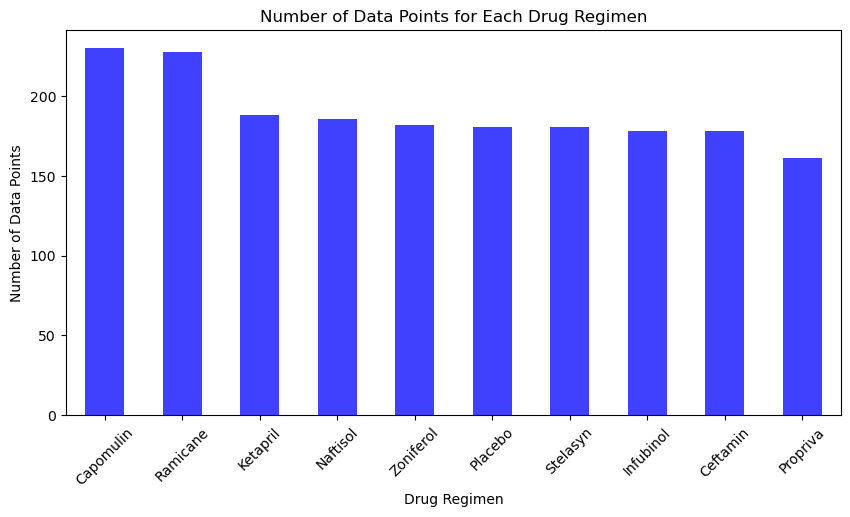

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_data["Drug Regimen"].value_counts()
plt_pandas = total_rows.plot(kind="bar", color="blue", alpha=0.75, align="center", width=0.5, figsize=(10,5))
plt_pandas.set_xlabel("Drug Regimen")
plt_pandas.set_ylabel("Number of Data Points")
plt_pandas.set_title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()

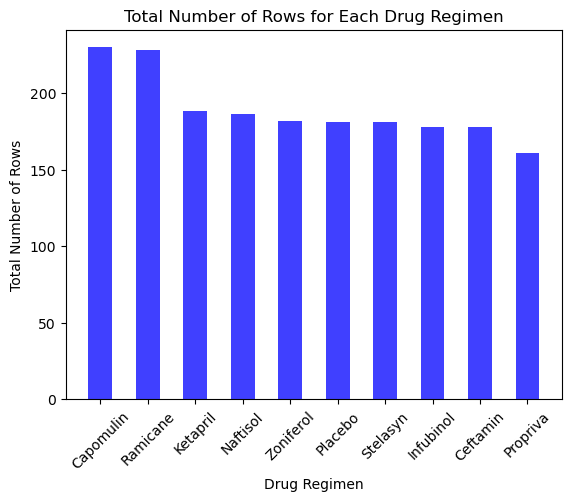

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_data["Drug Regimen"].value_counts()
x_axis = total_rows.index
y_axis = total_rows.values
plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center", width=0.5)    
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)
plt.show()

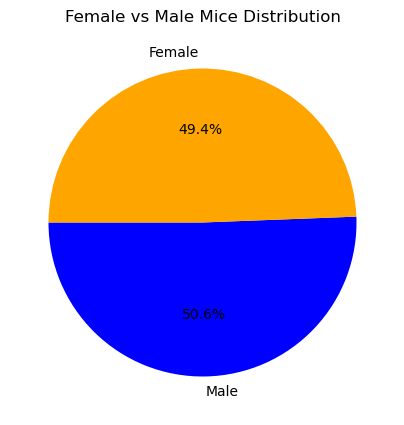

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%", startangle=180, colors=["blue", "orange"], figsize=(5,5))
plt.title("Female vs Male Mice Distribution")
plt.ylabel("")
plt.show()

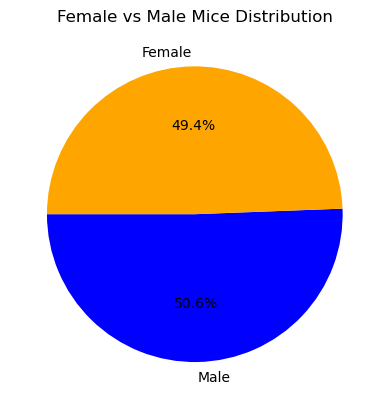

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = [50.6, 49.4]
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(distribution, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Female vs Male Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = clean_data.groupby(["Mouse ID"]).max().reset_index()
final_tumor_volume_merge = final_tumor_volume[["Mouse ID", "Timepoint"]].merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds
for treatment in treatments:
    quartiles = final_tumor_volume_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = lowerq - (1.5*iqr).round(2)
    upper_bound = upperq + (1.5*iqr).round(2)

    if final_tumor_volume_list == 0:
        print(f"--------------------------------------------------------")
    print(f"{treatment} IQR data is:")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")
    print(f"--------------------------------------------------------")
    final_tumor_volume_list += 1
 

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 45.93
The upper quartile of Capomulin is: 64.96
The interquartile range of Capomulin is: 19.03
Values below 17.39 for Capomulin could be outliers.
Values above 93.5 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 45.93
The upper quartile of Ramicane is: 64.96
The interquartile range of Ramicane is: 19.03
Values below 17.39 for Ramicane could be outliers.
Values above 93.5 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 45.93
The upper quartile of Infubinol is: 64.96
The interquartile range of Infubinol is: 19.03
Values below 17.39 for Infubinol could be outliers.
Values above 93.5 for Infubinol could be outliers.
--------------------------------------------------------
Ceftami

C:\Users\deby4\AppData\Local\Temp\ipykernel_20172\2468220884.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([final_tumor_volume_merge[final_tumor_volume_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],


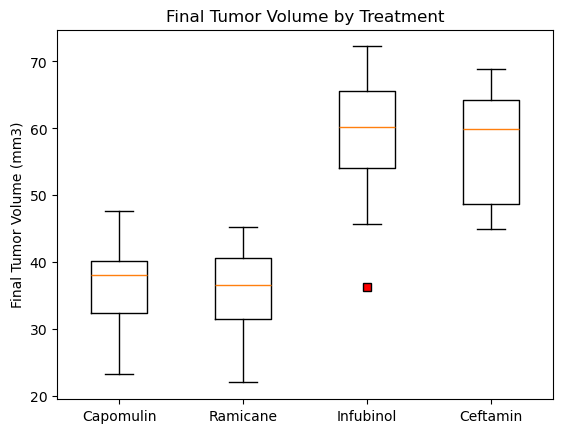

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor='r', marker='s')
plt.boxplot([final_tumor_volume_merge[final_tumor_volume_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],
             final_tumor_volume_merge[final_tumor_volume_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"],
             final_tumor_volume_merge[final_tumor_volume_merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"],
             final_tumor_volume_merge[final_tumor_volume_merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]], 
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=red_circle)
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

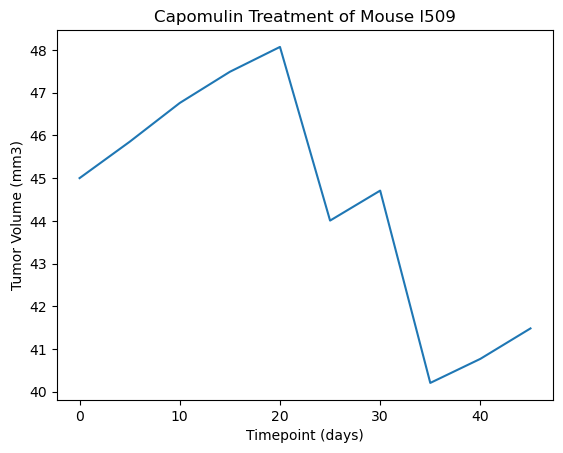

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

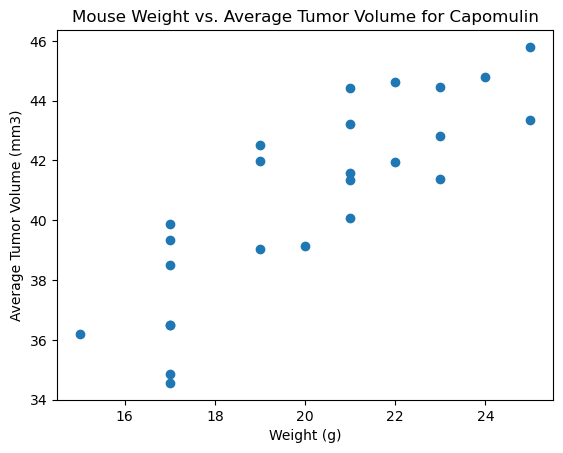

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig, ax = plt.subplots()
mean_capo_weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
mean_capo_tumor = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mean_capo_weight, mean_capo_tumor)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


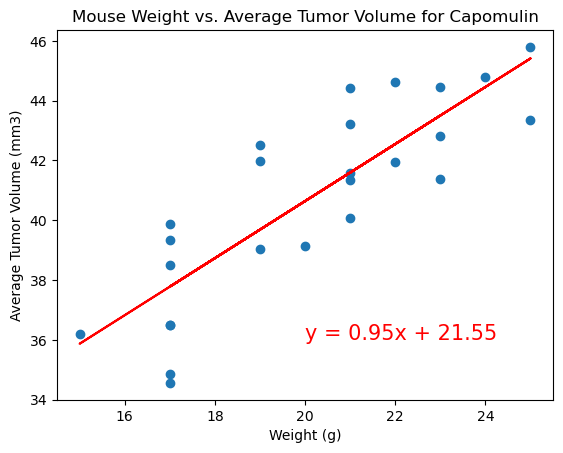

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mean_capo_weight, mean_capo_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(mean_capo_weight, mean_capo_tumor)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mean_capo_weight, mean_capo_tumor)
regress_values = mean_capo_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mean_capo_weight, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()
